In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import mlflow
import mlflow.sklearn
sns.set()



In [21]:
!pip install mlflow

  Using cached mlflow-2.21.3-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.21.3-py3-none-any.whl.metadata (31 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached pyarrow-19.0.1-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached databricks_sdk-0.50.0-py3-none-any.whl.metadata (38 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27

In [41]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
df['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [47]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [42]:
df = df[["survived",  "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "class"]]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


In [43]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
dtype: int64

In [44]:
df["age"].fillna(df["age"].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19620\3040546416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)


In [45]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19620\3995229981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


In [40]:
df = pd.get_dummies(df, columns=["sex", "embarked", "class"], drop_first =True)

In [51]:
#Encodage labelencoding
df['sex']=df['sex'].map({"male":0,"female":1})
df['embarked']=df['embarked'].map({"S":0,"C":1,"Q":2})
df['class']=df['class'].map({"Third":0,"First":1,"Second":2})


In [9]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True


In [52]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
dt = DecisionTreeClassifier(random_state=41, max_depth=3)

In [13]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=41)

In [14]:
y_pred = dt.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       105
           1       0.89      0.73      0.80        74

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [17]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8491620111731844

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Mort'),
 Text(0.25, 0.625, 'class_Third <= 0.5\ngini = 0.411\nsamples = 253\nvalue = [73, 180]\nclass = Survie'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'age <= 2.5\ngini = 0.113\nsamples = 133\nvalue = [8, 125]\nclass = Survie'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Mort'),
 Text(0.1875, 0.125, 'gini = 0.101\nsamples = 131\nvalue = [7, 124]\nclass = Survie'),
 Text(0.375, 0.375, 'fare <= 23.35\ngini = 0.497\nsamples = 120\nvalue = [65, 55]\nclass = Mort'),
 Text(0.3125, 0.125, 'gini = 0.494\nsamples = 94\nvalue = [42, 52]\nclass = Survie'),
 Text(0.4375, 0.125, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]\nclass = Mort'),
 Text(0.75, 0.625, 'age <= 3.5\ngini = 0.31\nsamples = 459\nvalue = [371, 88]\nclass = Mort'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'sibsp <= 2.5\ngini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Survie'),
 Text(0.

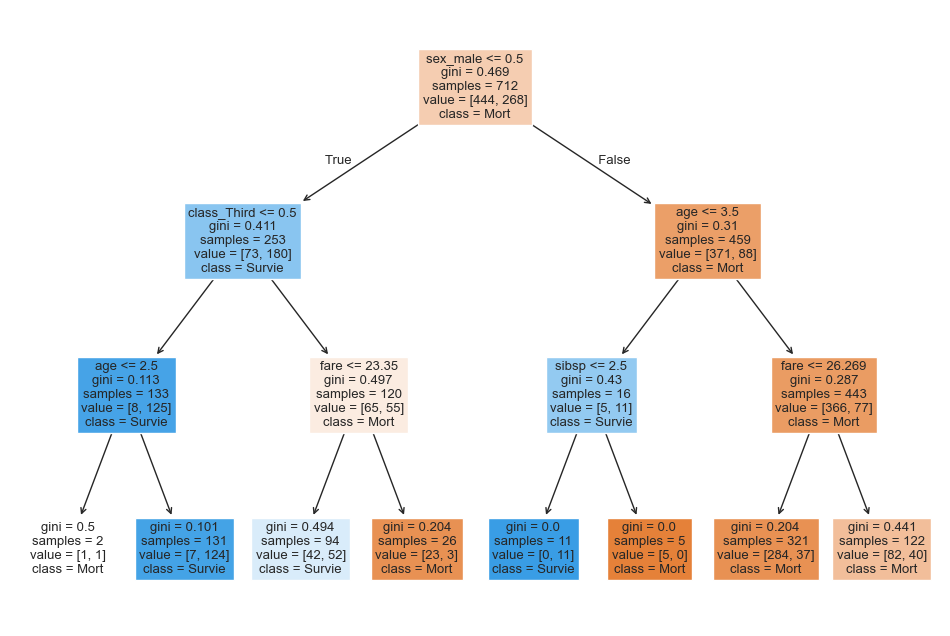

In [18]:
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=["Mort", "Survie"], filled=True)

In [24]:
#creer un enregistrement
mlflow.set_experiment('arbre_de_décision_titanic')

2025/04/16 00:55:54 INFO mlflow.tracking.fluent: Experiment with name 'arbre_de_décision_titanic' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/dell/Downloads/mlruns/541311403130367562', creation_time=1744757754943, experiment_id='541311403130367562', last_update_time=1744757754943, lifecycle_stage='active', name='arbre_de_décision_titanic', tags={}>

In [25]:
with mlflow.start_run():
    dt = DecisionTreeClassifier(random_state=41, max_depth=3)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    mlflow.log_param('max_depth',3)
    mlflow.sklearn.log_model(dt,'model')
    mlflow.log_metric("accuracy",accuracy)


2025/04/16 01:05:42 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/04/16 01:06:06 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

In [26]:
!mlflow ui

^C


In [27]:
mlflow.set_experiment('arbre_de_décision_2_titanic')

2025/04/16 01:21:50 INFO mlflow.tracking.fluent: Experiment with name 'arbre_de_décision_2_titanic' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/dell/Downloads/mlruns/162217110513131843', creation_time=1744759310954, experiment_id='162217110513131843', last_update_time=1744759310954, lifecycle_stage='active', name='arbre_de_décision_2_titanic', tags={}>

In [55]:
with mlflow.start_run(run_name='arbre de decision 2'):
    dt = DecisionTreeClassifier(random_state=41, max_depth=3)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    mlflow.log_param('max_depth',3)
    mlflow.sklearn.log_model(dt,'model')
    mlflow.log_metric("accuracy",accuracy)
    mlflow.log_metric("f1_score",f1_score(y_test,y_pred))
    mlflow.log_metric("precision_score",precision_score(y_test,y_pred))
    mlflow.log_param("model_type","DecisionTreeClassifier 2")


with mlflow.start_run(run_name='regression logistique 2'):
    dt_rl=LogisticRegression(random_state=41)
    dt_rl.fit(X_train,y_train)
    y_pred_rl=dt_rl.predict(X_test)
    accuracy_rl=accuracy_score(y_test,y_pred_rl)
    mlflow.log_param('max_depth',3)
    mlflow.sklearn.log_model(dt_rl,'model')
    mlflow.log_metric("accuracy",accuracy_rl)
    mlflow.log_metric("f1_score",f1_score(y_test,y_pred_rl))
    mlflow.log_metric("precision_score",precision_score(y_test,y_pred_rl))
    mlflow.log_param("model_type","LogisticRegression 2")

2025/04/16 02:19:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\dell\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/04/16 02:19:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
!mlflow ui